In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a black background image
theImage = np.zeros((300, 300, 3), dtype=np.uint8)

# Verticies of the irregular quadrilateral
theVertices = np.array([[125, 75], [175, 50], [200, 125], [100, 125]], np.int32)

# Draw the irregular quadrilateral
cv2.fillPoly(theImage, [theVertices], (255, 255, 255))


# Translate the image by (30, 100)
translationMatrix = np.float32([[1, 0, 30], [0, 1, 100]])
translatedImage = cv2.warpAffine(theImage, translationMatrix, (300, 300))


# Rotate the original image by 45 degrees about the center
theCenter = (theImage.shape[1] // 2, theImage.shape[0] // 2)
rotationMatrix = cv2.getRotationMatrix2D(theCenter, 45, 1)
rotatedImage = cv2.warpAffine(theImage, rotationMatrix, (300, 300))


# Rotate the translated image by 45 degrees about the center
theCenter2 = (translatedImage.shape[1] // 2, translatedImage.shape[0] // 2)
rotationMatrix2 = cv2.getRotationMatrix2D(theCenter2, 45, 1)
rotatedImage2 = cv2.warpAffine(translatedImage, rotationMatrix2, (300, 300))


#cv2.imshow('Keypoints Image', theImage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

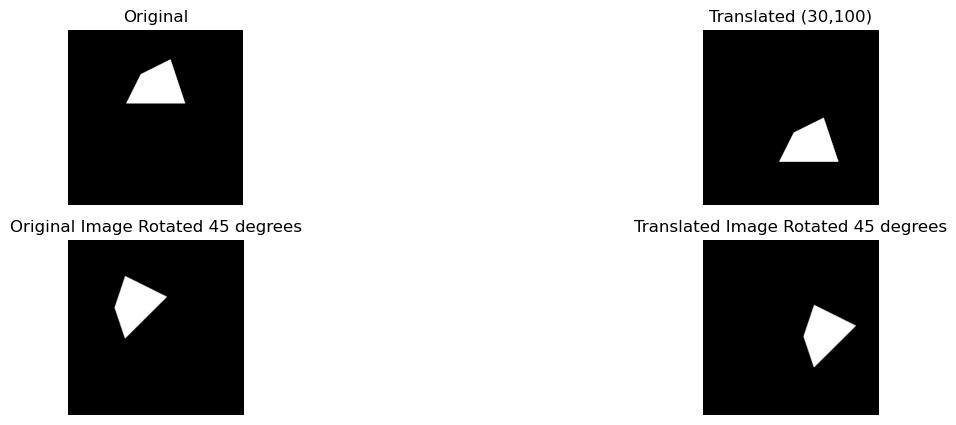

In [3]:
# Display the images side by side
# 15 inches wide, 5 inches tall
plt.figure(figsize=(15, 5))



plt.subplot(2, 2, 1)
plt.imshow(theImage)
plt.title('Original')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(translatedImage)
plt.title('Translated (30,100)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(rotatedImage)
plt.title('Original Image Rotated 45 degrees')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(rotatedImage2)
plt.title('Translated Image Rotated 45 degrees')
plt.axis('off')

plt.show()


In [4]:
# Load Images
imageLeft = cv2.imread("keble_a.jpg")
imageMiddle = cv2.imread("keble_b.jpg")
imageRight = cv2.imread("keble_c.jpg")

In [5]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and feature descriptors for each point
keypointsLeft, descriptorsLeft = sift.detectAndCompute(imageLeft, None)
keypointsMiddle, descriptorsMiddle = sift.detectAndCompute(imageMiddle, None)
keypointsRight, descriptorsRight = sift.detectAndCompute(imageRight, None)

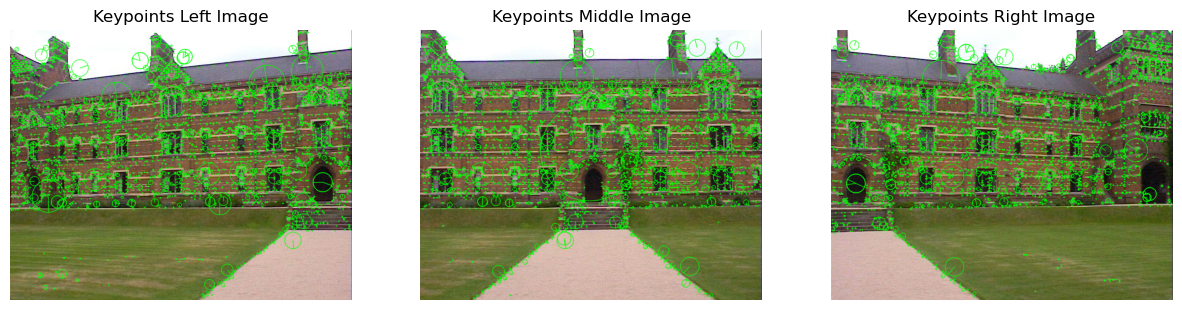

In [6]:
keypointsLeftImg = cv2.drawKeypoints(imageLeft, keypointsLeft, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
keypointsMiddleImg = cv2.drawKeypoints(imageMiddle, keypointsMiddle, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
keypointsRightImg = cv2.drawKeypoints(imageRight, keypointsRight, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images side by side
# 15 inches wide, 5 inches tall
plt.figure(figsize=(15, 5))



plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(keypointsLeftImg, cv2.COLOR_BGR2RGB))
plt.title('Keypoints Left Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(keypointsMiddleImg, cv2.COLOR_BGR2RGB))
plt.title('Keypoints Middle Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(keypointsRightImg, cv2.COLOR_BGR2RGB))
plt.title('Keypoints Right Image')
plt.axis('off')


plt.show()

In [7]:
# Brute force matcher
bf = cv2.BFMatcher()

# Uses nearest neighbor, Euclidean distance
# For each descriptor in the middle image, find 2 best desciprtor matches...
# ... in the left image
# Smaller the value, better the match

# !!!
theMatches = bf.knnMatch(descriptorsMiddle, descriptorsLeft, k=2)
theMatches2 = bf.knnMatch(descriptorsMiddle, descriptorsRight, k=2)

In [8]:
# For storing the good matches
goodMatches = []

# For thresholding the good matches
ratioThreshold = 0.2

# Goes through the matches
for bestMatch, secondBestMatch in theMatches:
    # If within the threshold, is a good match
    if bestMatch.distance < (ratioThreshold * secondBestMatch.distance):
        goodMatches.append(bestMatch)

In [9]:
# For storing the good matches
goodMatches2 = []

# For thresholding the good matches
ratioThreshold = 0.2

# Goes through the matches
for bestMatch, secondBestMatch in theMatches2:
    # If within the threshold, is a good match
    if bestMatch.distance < (ratioThreshold * secondBestMatch.distance):
        goodMatches2.append(bestMatch)

(-0.5, 1439.5, 567.5, -0.5)

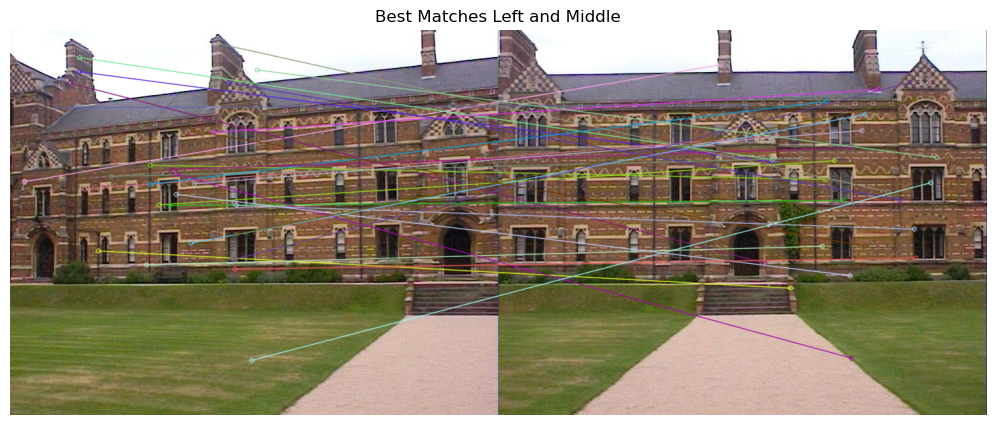

In [10]:
# Draw lines between the keypoints that are good matches
bestMatchesImg = cv2.drawMatches(imageLeft, keypointsLeft, imageMiddle, keypointsMiddle, goodMatches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the images side by side
# 15 inches wide, 5 inches tall
plt.figure(figsize=(15, 5))


plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(bestMatchesImg, cv2.COLOR_BGR2RGB))
plt.title('Best Matches Left and Middle')
plt.axis('off')



(-0.5, 1439.5, 567.5, -0.5)

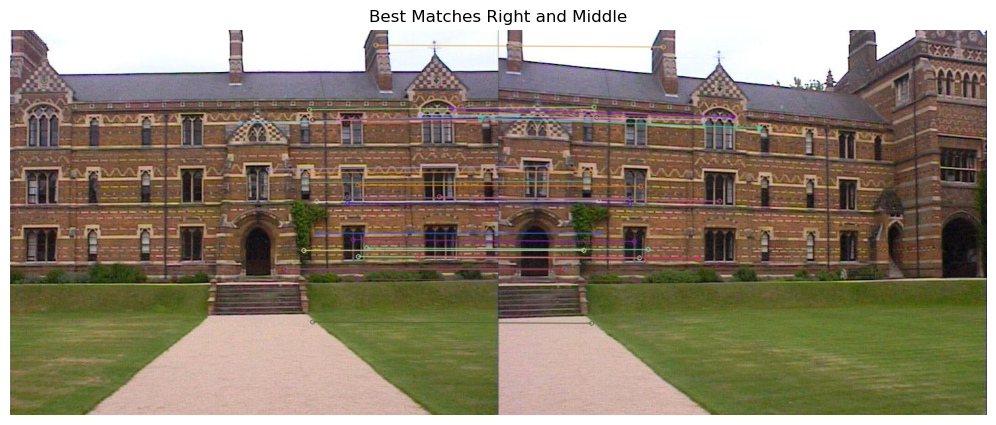

In [11]:
# Draw lines between the keypoints that are good matches
bestMatchesImg2 = cv2.drawMatches(imageMiddle, keypointsMiddle, imageRight, keypointsRight, goodMatches2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the images side by side
# 15 inches wide, 5 inches tall
plt.figure(figsize=(15, 5))


plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(bestMatchesImg2, cv2.COLOR_BGR2RGB))
plt.title('Best Matches Right and Middle')
plt.axis('off')

In [12]:
#print(goodMatches)

# x,y coordinates of all good matches in left image
im1_pts = np.float32([keypointsLeft[m.trainIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
# x,y coordinates of good matches in middle image
im2_pts = np.float32([keypointsMiddle[m.queryIdx].pt for m in goodMatches]).reshape(-1, 1, 2)

# Gets rid of extra list
im1_pts = im1_pts.reshape(-1, 2)
im2_pts = im2_pts.reshape(-1, 2) 


# x,y coordinates of all good matches in left image
im3_pts = np.float32([keypointsRight[m.trainIdx].pt for m in goodMatches2]).reshape(-1, 1, 2)
# x,y coordinates of good matches in middle image
im4_pts = np.float32([keypointsMiddle[m.queryIdx].pt for m in goodMatches2]).reshape(-1, 1, 2)

# Gets rid of extra list
im3_pts = im3_pts.reshape(-1, 2)
im4_pts = im4_pts.reshape(-1, 2)  


#print(im1_pts)
#print(im2_pts)

In [13]:
def computeH(im1_pts, im2_pts):
    # Convert list to numpy array
    im1_pts = np.array(im1_pts)
    im2_pts = np.array(im2_pts)
    
    # Add a 3rd column which is a 1 
    im1_pts_homo = np.hstack((im1_pts, np.ones((im1_pts.shape[0], 1))))
    im2_pts_homo = np.hstack((im2_pts, np.ones((im2_pts.shape[0], 1))))
    
    # Construct the matrix A for the linear system Ah = 0
    A = np.zeros((8,9))
    
    # Goes through the correspondences
    for i in range(4):
        # Extracting the coordinates
        x = im1_pts_homo[i][0]
        y = im1_pts_homo[i][1]
        z = im1_pts_homo[i][2]
        
        u = im2_pts_homo[i][0]
        v = im2_pts_homo[i][1]
        w = im2_pts_homo[i][2]
    
        # Using coordinates, populate rows of "A"
        A[2*i] = [-x, -y, -z, 0, 0, 0, u*x, u*y, u*z]
        A[2*i+1] = [0, 0, 0, -x, -y, -z, v*x, v*y, v*z]
        

    # Use SVD
    # Get transpose of the right singular vectors of the matrix A
    _, _, vh = np.linalg.svd(A)
    
    # Gets last row
    h = vh[8, :]
    
    # Turn from 1x9 to 3x3
    H = h.reshape((3,3))
    return H
        
        

In [14]:
def ransac(corrImage1, corrImage2, thresh, iter):
    maxInliers = 0
    bestH = None
    maxInliersIndexes = []
    
    
    # 1 loop for each iteration. Looking for best correspondences 
    for _ in range(iter):
        src_pts = []
        dst_pts = []
        
        # Gets 4 random indexes for the correspondences
        # replace=False so same correspondence can't be picked twice
        randomIndices = np.random.choice(len(corrImage1), 4, replace=False)
        
        # Stores location of 4 random correspondences
        for i in range(4):
            #print("cool")
            #print(randomIndices[i])
            src_pts.append(corrImage1[randomIndices[i]])
            dst_pts.append(corrImage2[randomIndices[i]])

        # Compute the homography
        H = computeH(src_pts, dst_pts)
        
        #print(H)
        
        
        # For storing index of inliers
        inliers = []
        
        
        # Convert list to numpy array
        corrImage1 = np.array(corrImage1)
        corrImage2 = np.array(corrImage2)

        # Add a 3rd column which is a 1 
        corrImage1Homo = np.hstack((corrImage1, np.ones((corrImage1.shape[0], 1))))
        corrImage2Homo = np.hstack((corrImage2, np.ones((corrImage2.shape[0], 1))))
        
        # Looping through all correspondences
        for i in range(len(corrImage1)):
            # Extracting the coordinates
            x = corrImage1Homo[i][0]
            y = corrImage1Homo[i][1]
            z = corrImage1Homo[i][2]
            
            # Multiply each by the homography matrix
            u, v, w = np.dot(H, [x,y,z])
            
            # Convert back to heterogeneous coordinates
            u /= w
            
            v /= w
            
            #print(np.sqrt((u - corrImage2Homo[i, 0])**2 + (v - corrImage2Homo[i, 1])**2))
            
            # If correspondence is an inlier
            if(np.sqrt((u - corrImage2Homo[i, 0])**2 + (v - corrImage2Homo[i, 1])**2) < thresh):
                inliers.append(i)
                
        print(iter)        
        print(len(inliers))
               
        
        # Update H if current interation has more inliers
        if len(inliers) > maxInliers:
            maxInliers = len(inliers)
            bestH = H
            maxInliersIndexes = inliers
         
        
    #print(maxInliers)    
    #for i in range(len(maxInliersIndexes)):
        #print(maxInliersIndexes[i])
            
            
    src_pts = []
    dst_pts = []
    
    
    # Re-estimate homography from all inliers
    for i in range(len(maxInliersIndexes)):
        src_pts.append(corrImage1[maxInliersIndexes[i]])
        dst_pts.append(corrImage2[maxInliersIndexes[i]])
        
    #print(src_pts[0])
    #print(dst_pts[0])
        
        
    bestH = computeH(src_pts, dst_pts)
        
    return bestH, maxInliers, maxInliersIndexes

In [15]:
maxInliers = 0
bestH = None
maxInliersIndexes = []

# !!!
bestH, maxInliers, maxInliersIndexes = ransac(im2_pts, im1_pts, 150, 1000)


print(len(goodMatches2))
print(len(maxInliersIndexes2))

# Only going to show the matches that are included in the maxInliers
matchesToDraw = [goodMatches[i] for i in maxInliersIndexes]


#Draw matches using only the specified good matches
superMatchesImg = cv2.drawMatches(imageLeft, keypointsLeft, imageMiddle, keypointsMiddle, matchesToDraw, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
22
1000
20
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
21
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
22
1000
22
1000
23
1000
28
1000
28
1000
28
1000
25
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
24
1000
28
1000
28
1000
28
1000
28
1000
27
1000
28
1000
28
1000
19
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
25
1000
28
1000
28
1000
28
1000
28
1000
28
1000
16
1000
28
1000
28
1000
22
1000
28
1000
20
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
12
1000
28
1000
28
1000
28
1000
28
1000
26
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
14
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
24
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
17
1000
8
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1000
28
1

NameError: name 'maxInliersIndexes2' is not defined

In [ ]:
maxInliers2 = 0
bestH2 = None
maxInliersIndexes2 = []


bestH2, maxInliers2, maxInliersIndexes2 = ransac(im4_pts, im3_pts, 0.75, 1000)

print(len(goodMatches2))
print(len(maxInliersIndexes2))

# Only going to show the matches that are included in the maxInliers
matchesToDraw2 = [goodMatches2[i] for i in maxInliersIndexes2]

#Draw matches using only the specified good matches
superMatchesImg2 = cv2.drawMatches(imageMiddle, keypointsMiddle, imageRight, keypointsRight, matchesToDraw2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

(-0.5, 1439.5, 567.5, -0.5)

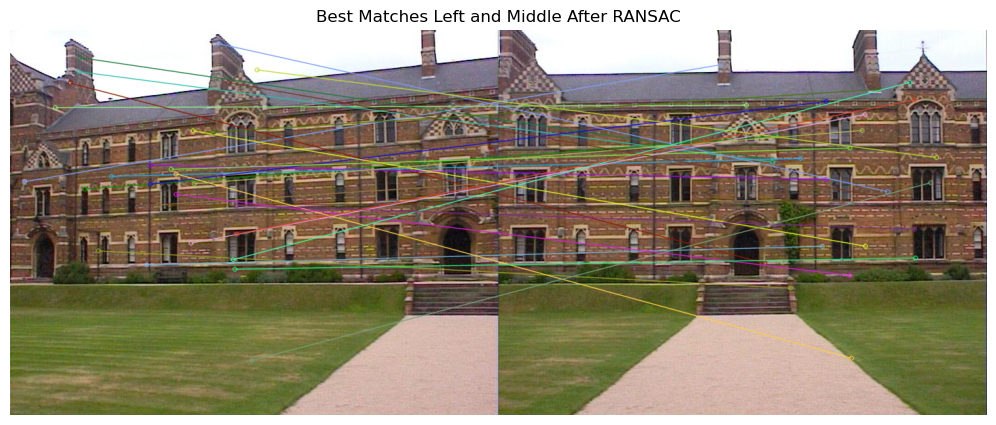

In [133]:
# Display the image with the best matches

# Display the images side by side
# 15 inches wide, 5 inches tall
plt.figure(figsize=(15, 5))


plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(superMatchesImg, cv2.COLOR_BGR2RGB))
plt.title('Best Matches Left and Middle After RANSAC')
plt.axis('off')

(-0.5, 1439.5, 567.5, -0.5)

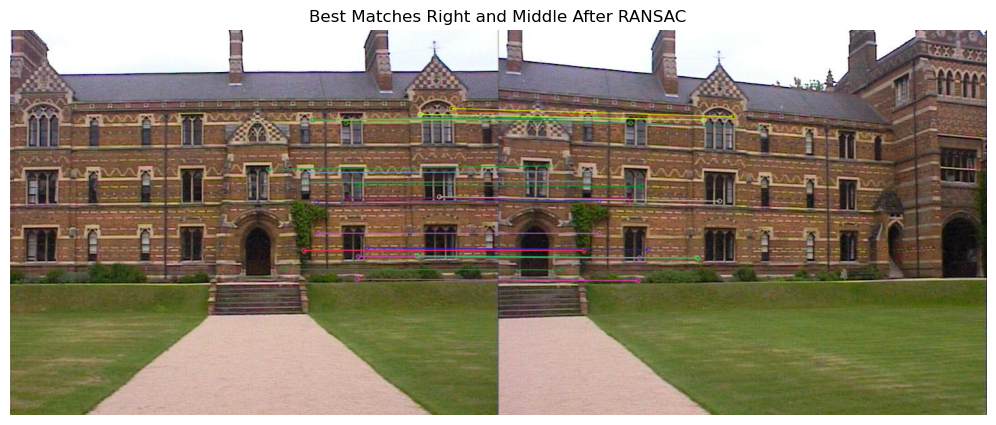

In [134]:
# Display the image with the best matches

# Display the images side by side
# 15 inches wide, 5 inches tall
plt.figure(figsize=(15, 5))


plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(superMatchesImg2, cv2.COLOR_BGR2RGB))
plt.title('Best Matches Right and Middle After RANSAC')
plt.axis('off')

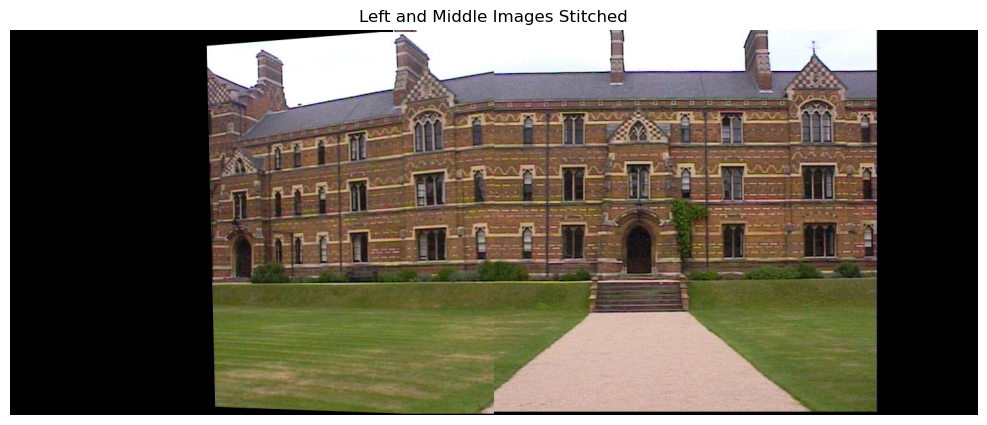

In [135]:
#print(bestH)

mosaic_width = imageLeft.shape[1] + imageMiddle.shape[1]
mosaic_height = imageLeft.shape[0] + 5
mosaic = np.zeros((mosaic_height, mosaic_width, 3), dtype=np.uint8)


warped_image1 = cv2.warpPerspective(imageLeft, bestH, (720, 568))
warped_image2 = cv2.warpPerspective(imageRight, bestH2, (720, 568))

# Warp image2 into the mosaic using a simple translation (no homography needed for this example)
mosaic[:imageMiddle.shape[0], imageMiddle.shape[1]-150:1290] = imageMiddle

# Copy the warped image1 into the mosaic at the appropriate location
mosaic[3:warped_image1.shape[0]+3, :warped_image1.shape[1]] = warped_image1

#mosaic[:warped_image2.shape[0], 1440:2160] = warped_image2


# Display the images side by side
# 15 inches wide, 5 inches tall
plt.figure(figsize=(15, 5))



plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(mosaic, cv2.COLOR_BGR2RGB))
plt.title('Left and Middle Images Stitched')
plt.axis('off')


plt.show()

In [136]:
#print(bestH)

mosaic_width = imageLeft.shape[1] + imageMiddle.shape[1] + imageRight.shape[1]
mosaic_height = imageLeft.shape[0] + 5
mosaic = np.zeros((mosaic_height, mosaic_width, 3), dtype=np.uint8)


warped_image1 = cv2.warpPerspective(imageLeft, bestH, (720, 568))
warped_image2 = cv2.warpPerspective(imageRight, bestH2, (720, 568))

# Positon left image
mosaic[:imageMiddle.shape[0], imageMiddle.shape[1]-150:1290] = imageMiddle

# Position middle image
mosaic[3:warped_image1.shape[0]+3, :warped_image1.shape[1]] = warped_image1

# Position right image
mosaic[:warped_image2.shape[0], 1195:1915] = warped_image2


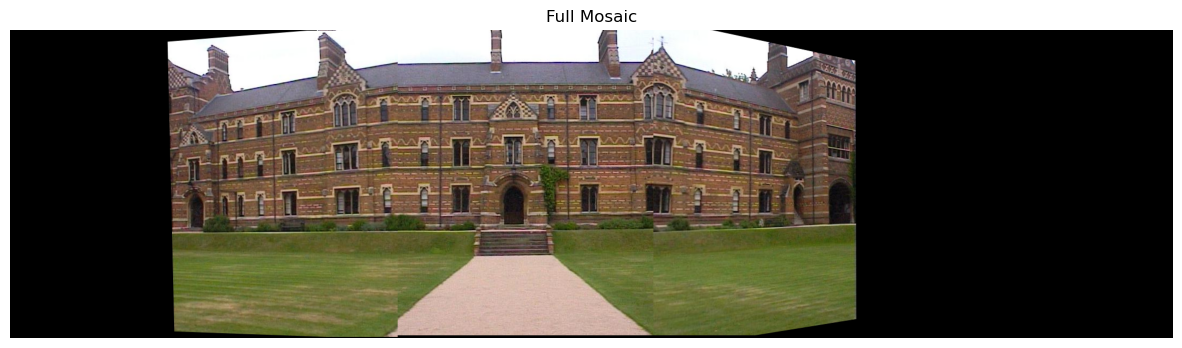

In [137]:
# Display the images side by side
# 15 inches wide, 5 inches tall
plt.figure(figsize=(15, 5))



plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(mosaic, cv2.COLOR_BGR2RGB))
plt.title('Full Mosaic')
plt.axis('off')


plt.show()